# 第八章F：Python杂项

## 1. 容器类型：可迭代（iterable）对象与迭代器（iterator）

在Python中有很多容器类型，如List，tuple，str，set，dict等都是容器类型。

In [1]:
from collections.abc import Iterable, Iterator, Generator, Hashable, Reversible

### list/tuple/dict/str都是Iterable object?

In [3]:
print("A list is iterable: ", isinstance(list(), Iterable))
print("A tuple is iterable: ", isinstance(tuple(), Iterable))
print("A dict is iterable: ", isinstance(dict(), Iterable))
print("A str is iterable: ", isinstance("", Iterable))

A list is iterable:  True
A tuple is iterable:  True
A dict is iterable:  True
A str is iterable:  True


这些对象都是可迭代的，因为这些对象都定义了`__iter__()`方法：

In [5]:
print("__iter__" in dir(list()))
print("__iter__" in dir(dict()))
print("__iter__" in dir(tuple()))
print("__iter__" in dir(""))

True
True
True
True


### list/tuple/dict/str都不是Iterator?

In [4]:
print("A list is an iterator: ", isinstance(list(), Iterator))
print("A tuple is an iterator: ", isinstance(tuple(), Iterator))
print("A dict is an iterator: ", isinstance(dict(), Iterator))
print("A str is an iterator: ", isinstance("", Iterator))

A list is an iterator:  False
A tuple is an iterator:  False
A dict is an iterator:  False
A str is an iterator:  False


这是因为这些方法都没有定义`__next__()`方法。按照迭代器的约定，必须是定义了`__next__()`方法的才是迭代器。

In [6]:
print("__next__" in dir(list()))
print("__next__" in dir(dict()))
print("__next__" in dir(tuple()))
print("__next__" in dir(""))

False
False
False
False


## 2. Hashable vs. Immutable

- All of the immutable atomic instances in python are hashable.

所有的原子类型数据都是hashable的，也是immutable的。

- The immutable container instances are hashable if all of their elements are hashable.

对于不可变的容器类型的实例来说，如果其所有元素都是hashable的，那么它也就是hashable的。
这里举个简单的例子：`(1,2,3,[4,5])`这个元组，虽然元组是Immutable的，但是元组中包含一个元素`[4,5]`是unhashable的，所以元组也不是hashable的。
- An object is hashable if it has a hash value which never changes during its lifetime (it needs a `__hash__()` method), and can be compared to other objects (it needs an `__eq__()` or `__cmp__()` method). Hashable objects which compare equal must have the same hash value.

In [7]:
isinstance(3.5, Hashable)

True

因为这些类型都定义了一个`__hash__()`方法，这个方法返回对象的哈希值：

In [10]:
x = 3.5

In [11]:
x.__hash__()

1152921504606846979

或者调用`hash()`函数也可以返回：

In [12]:
hash(x)

1152921504606846979

- 一般来说，用户自定义的类的实例都是hashable的，其哈希值就是通过`id()`进一步计算得到的：

In [13]:
class Number():
    num = 0

In [23]:
n1 = Number()

In [15]:
isinstance(n1, Hashable)

True

In [16]:
hash(n1)

8762505506109

In [17]:
id(n1)

140200088097744

- 我们说，hashable的对象都可作为字典的键，让我们检验一下：

In [24]:
y = {n1:10}

In [25]:
n1.num = 5

In [26]:
y[n1]

10

- <font color="red">很多Python教程都声称，Immutable类型的对象可以作为dict的key，这其实是错误的，只有hashable的对象才能作为key。</font>

既然提到了immutable，我们就来说说什么是immutable。

- 原子类型的对象都是immutable的，因为原子类型的数据只有通过全局赋值的方式去修改变量的引用，也就是说对原子类型的数据`var`来说，要修改其指向的值`value`，唯一的方式就是通过执行`var=newvalue`。这无疑会导致其id被改变。

- 对于容器类型的变量而言，对于mutable对象如list、dict、set来说，要修改其引用的值，并不都需要去对整个变量去重新赋值。比如对list而言，我们有`<list>.append()`、`<list>.extend()`等方法，还有就是对个别元素重新赋值。这些操作会影响容器中的元素的id，但不会改变容器整体的id。

- 对于tuple这种immutable的类型来说，容器的id不变，那么其每个元素的id也就不能改变。我们不能针对某个元素去重新赋值，也不能附加和扩展元素。但是，如果tuple的个别元素为list或set的话，我们是可以通过操作这个元素来实现对容器的值的修改的：

In [82]:
tp = (1,2,3,[1,2,3])
print("tp: ", id(tp))
print("tp[-1]:", id(tp[-1]))
tp[-1].append(4)
print("====After appending=====")
print(tp)
print("tp[-1]:", id(tp[-1]))
print("tp: ", id(tp))

tp:  140199622317360
tp[-1]: 140199632605584
====After appending=====
(1, 2, 3, [1, 2, 3, 4])
tp[-1]: 140199632605584
tp:  140199622317360


但这种操作不影响到`tp`每个元素的id，更不会影响到`tp`的id。

所以，有些教程中断言：
> 所有immutable对象都可以作为dict的key。

的论断是错误的，比如上面的这个tuple，虽然是immutable的，但并不是hashable的。

## 3. 如何定义只有一个元素的tuple？

In [27]:
t = (5.0)

对么？让我们检查一下：

In [28]:
type(t)

float

似乎有问题，这样定义的话，对象被视为原子对象`float`。那么，该怎么定义呢？

In [29]:
t = (5.0,)

In [30]:
type(t)

tuple

嗯，这才是正确的定义方式。以后我们常常会在`numpy`的`array`和`pandas`的`Series`中看到这种情形：

In [31]:
import numpy as np

In [32]:
vec = np.array(np.arange(5))
vec.shape

(5,)

但是，对于列表等就不存在这种情况了：

In [33]:
type([2.5])

list

In [34]:
type({3.3})

set

In [35]:
type({'a':1})

dict

所以tuple真的是一种非常特殊的类型：

- 定义的时候没有括号也是可以的：

In [37]:
t = 3,3
type(t)

tuple

In [38]:
print(t)

(3, 3)


In [41]:
t=3,2==2
print(t)

(3, True)


## 4. 匿名函数的类型是什么？

In [42]:
type(lambda: None)

function

In [50]:
del y

## 5. 对于bool变量来说，哪些值是False？

这似乎是一个非常简单的问题，但是很容易出错，我们看看下面这个例子：

In [52]:
x=True;y=0;z=False,False

In [53]:
if x or y and z:
    print('yes')
else:
    print("no")

yes


我们将上述表达式拆解开来看：

In [56]:
print(y)

0


In [57]:
print(z)

(False, False)


那么问题就是这个tuple是True还是False？

In [45]:
bool((False, False))

True

而同样的

In [58]:
bool((False,))

True

因此，我们可以用一张表总结一下，看哪些对象为False：

| 对象 | 布尔值 |
| --- | --- |
| 0 | False |
| None | False |
| False | False |
| 0.0 | False |
| "" | False |
| [] | False |
| () | False |
| {} | False |
| list() | False |
| tuple() | False |
| set() | False |
| dict() | False |

In [76]:
def func(obj):
    obj[-1].append(0)

tobj = (1,2,3,[1,2,3])
func(tobj)
print(tobj)

(1, 2, 3, [1, 2, 3, 0])


## 6. Python函数调用的时候是pass-by-value还是pass-by-reference?

我们在学C/C++的时候知道函数的调用有两种方式，pass-by-value和pass-by-reference。那么对Python来说，是pass-by-value还是pass-by-reference?

我们来看看这个例子：

In [85]:
def update(li):
    assert(isinstance(li, list))
    print(id(li))
    li.append(5)
    print(id(li))
    li = [2,3,4]
    print(id(li))
    print(li)
    
lst = [1,2,3]
update(lst)
print(lst)

140199632615936
140199632615936
140199632617296
[2, 3, 4]
[1, 2, 3, 5]


我们可以看到，
- 当`lst`被作为参数传递给`update`函数时，其值被修改为了`[1,2,3,5]`，看起来像是pass-by-reference？
- 当运行`li = [2,3,4]`的时候，对`lst`的值却没有影响，看起来似乎是pass-by-value？

那么，到底是如何一种机制呢？

其实都不是，Python采取的是一种称为`call-by-sharing`的机制。
- 函数调用时创建了一个新的变量，指向`lst`引用的地址。
- 当执行`append()`操作的时候，会影响到指向地址值的改变，从而也影响了`lst`的值。
- 但是当运行赋值操作`li=[2,3,4]`时，新的变量的整个引用地址就发生了改变，所以这个改变也不会影响到`lst`的值。

这本质上是不是还是引用，只不过Python的某些对象是immutable，不能进行一些操作而已？

## 7. 引用 vs. 浅拷贝 vs. 深拷贝

我们一般在比较这几个概念的时候，往往针对的是容器变量的操作

In [87]:
from copy import copy, deepcopy

In [98]:
a = [1,2,3,[1,2,3]]
b = a                          # reference
c = a[:]                       # slicing
d = a.copy()

In [99]:
e = copy(a)
f = deepcopy(a)

- `b=a`称为引用（reference），操作`b`的值会影响到`a`，反之亦然。

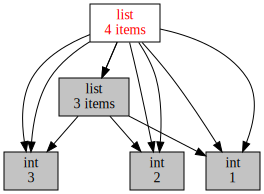

In [100]:
import objgraph
objgraph.show_refs([a,b])

- `c=a[:]`称为切片拷贝，本质上是一种浅拷贝（新建了一个对象，但原子元素和容器元素的引用都还相同）：

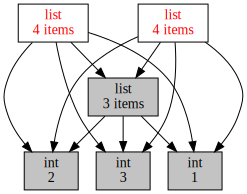

In [102]:
objgraph.show_refs([a,c])

- `d = a.copy()`和`e = copy.copy(a)`都是一种浅拷贝，跟前面的切片拷贝类似。

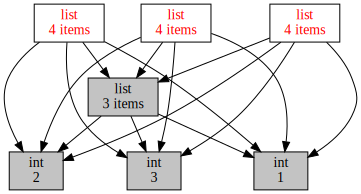

In [104]:
objgraph.show_refs([a,d,e])

- `f=copy.deepcopy(a)`是一种深拷贝（新建一个对象，原子元素的引用未变，容器元素也新建了一个对象，内中元素指向不变）

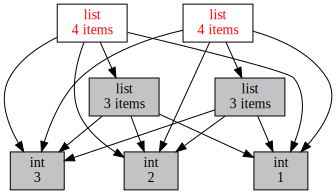

In [105]:
objgraph.show_refs([a,f])

In [111]:
b[-1].append(4)
b.append(5)
b[2] = 7

In [112]:
print(a)

[1, 2, 7, [1, 2, 3, 4], 5]


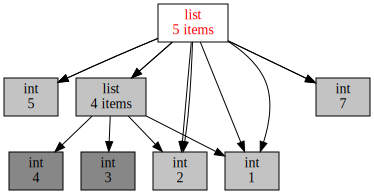

In [113]:
objgraph.show_refs([a,b])

In [114]:
print(c)

[1, 2, 3, [1, 2, 3, 4]]


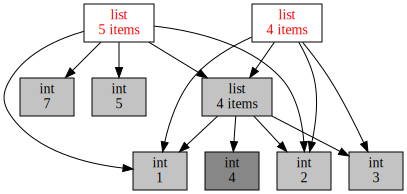

In [115]:
objgraph.show_refs([a,c])

In [116]:
print(d)

[1, 2, 3, [1, 2, 3, 4]]


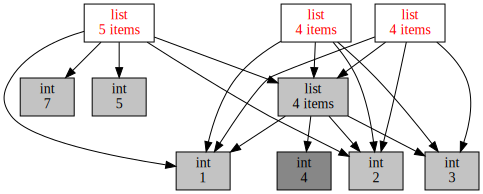

In [117]:
objgraph.show_refs([a,d,e])

In [118]:
print(e)

[1, 2, 3, [1, 2, 3, 4]]


- `f = deepcopy(a)`是一种深拷贝，创建了一个全新的对象

In [119]:
print(f)

[1, 2, 3, [1, 2, 3]]


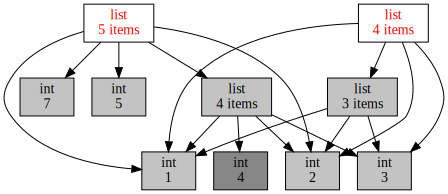

In [120]:
objgraph.show_refs([a,f])

In [121]:
False and True or False

False

In [126]:
x = 5

In [129]:
+@x

SyntaxError: invalid syntax (<ipython-input-129-2dfb02b96a33>, line 1)

In [128]:
x

5